# Car Sales Data

### Examining correlation between car specifications

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df=pd.read_csv('Car_sales.csv')

In [2]:
# To explore the data 
df


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
# Check for data types 
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

## Data Cleaning

In [4]:
# Delete duplicate rows 
df=df.drop_duplicates()

In [5]:
#Check for empty values in the data.
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [6]:
df[df['__year_resale_value'].isna()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
18,Cadillac,Escalade,14.785,NaN,Car,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,4/17/2012,109.509117
27,Chevrolet,Impala,107.995,NaN,Passenger,18.890,3.4,180.0,110.5,73.0,200.0,3.389,17.0,27.0,6/18/2011,71.838039
34,Chrysler,300M,30.696,NaN,Passenger,29.185,3.5,253.0,113.0,74.4,197.8,3.567,17.0,23.0,2/10/2012,101.655244
44,Dodge,Durango,101.323,NaN,Car,26.310,5.2,230.0,115.7,71.7,193.5,4.394,25.0,17.0,6/27/2012,92.854125
50,Ford,Focus,175.670,NaN,Passenger,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.0,7/22/2012,43.117132
66,Jaguar,S-Type,15.467,NaN,Passenger,42.800,3.0,240.0,114.5,71.6,191.3,3.650,18.4,21.0,11/3/2012,102.178985
72,Lexus,GS400,3.334,NaN,Passenger,46.305,4.0,300.0,110.2,70.9,189.2,3.693,19.8,21.0,11/28/2012,125.013357
74,Lexus,LX470,9.126,NaN,Car,60.105,4.7,230.0,112.2,76.4,192.5,5.401,25.4,15.0,10/30/2012,105.760458
75,Lexus,RX300,51.238,NaN,Car,34.605,3.0,220.0,103.0,71.5,180.1,3.900,17.2,21.0,1/4/2012,91.943802


In [7]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
# Check for empty values in the __year_resale_value field.
df[df['__year_resale_value'].isna()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
18,Cadillac,Escalade,14.785,NaN,Car,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,4/17/2012,109.509117
27,Chevrolet,Impala,107.995,NaN,Passenger,18.890,3.4,180.0,110.5,73.0,200.0,3.389,17.0,27.0,6/18/2011,71.838039
34,Chrysler,300M,30.696,NaN,Passenger,29.185,3.5,253.0,113.0,74.4,197.8,3.567,17.0,23.0,2/10/2012,101.655244
44,Dodge,Durango,101.323,NaN,Car,26.310,5.2,230.0,115.7,71.7,193.5,4.394,25.0,17.0,6/27/2012,92.854125
50,Ford,Focus,175.670,NaN,Passenger,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.0,7/22/2012,43.117132
66,Jaguar,S-Type,15.467,NaN,Passenger,42.800,3.0,240.0,114.5,71.6,191.3,3.650,18.4,21.0,11/3/2012,102.178985
72,Lexus,GS400,3.334,NaN,Passenger,46.305,4.0,300.0,110.2,70.9,189.2,3.693,19.8,21.0,11/28/2012,125.013357
74,Lexus,LX470,9.126,NaN,Car,60.105,4.7,230.0,112.2,76.4,192.5,5.401,25.4,15.0,10/30/2012,105.760458
75,Lexus,RX300,51.238,NaN,Car,34.605,3.0,220.0,103.0,71.5,180.1,3.900,17.2,21.0,1/4/2012,91.943802


In [9]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [10]:
# Replace the missing values with the mean of the __year_resale_value field
df['__year_resale_value'].fillna(18.072975, inplace=True)

In [11]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

In [12]:
df[df['Price_in_thousands'].isna()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,1/4/2012,NaN
33,Chrysler,Town & Country,53.480,19.540,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN


In [13]:
# Replace the missing values with the mean of the Price_in_thousands field
df['Price_in_thousands'].fillna(27.390755, inplace=True)

In [14]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

In [15]:
df[df['Engine_size'].isna()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
33,Chrysler,Town & Country,53.48,19.54,Car,27.390755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN


In [16]:
df[df['Horsepower'].isna()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
33,Chrysler,Town & Country,53.48,19.54,Car,27.390755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN


In [17]:
# Since row 33 has numerous missing values to make sense of the data, it is best to delete the row
df=df.drop(index=33, axis=True)

In [18]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            1
Fuel_capacity          0
Fuel_efficiency        2
Latest_Launch          0
Power_perf_factor      1
dtype: int64

In [19]:
df[df['Curb_weight'].isna()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
15,Cadillac,Seville,15.943,27.1,Passenger,44.475,4.6,275.0,112.2,75.0,201.0,NaN,18.5,22.0,4/29/2011,115.621358


In [20]:
# Peform descriptive analysis on the Cadillac vehicles to obtain the mean curb weight.
df[df['Manufacturer']=='Cadillac'].describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000
mean,22.435600,22.329595,40.254000,4.500000,256.000000,112.08000,74.460000,200.960000,4.290750,20.800000,20.600000,107.246808
std,23.373081,4.162038,5.903326,0.964365,32.480764,4.42459,2.506591,4.389533,0.858502,5.155095,3.130495,13.473366
min,6.536000,18.072975,31.010000,3.000000,200.000000,107.40000,70.300000,194.800000,3.770000,18.000000,15.000000,83.483094
25%,11.185000,18.225000,39.665000,4.600000,255.000000,108.00000,74.500000,200.600000,3.824750,18.500000,22.000000,109.509117
50%,14.785000,22.525000,39.895000,4.600000,275.000000,112.20000,75.000000,201.000000,3.910500,18.500000,22.000000,113.765874
75%,15.943000,25.725000,44.475000,4.600000,275.000000,115.30000,75.500000,201.200000,4.376500,19.000000,22.000000,113.854598
max,63.729000,27.100000,46.225000,5.700000,275.000000,117.50000,77.000000,207.200000,5.572000,30.000000,22.000000,115.621358


In [21]:
# Although the mean curb weight might not be close to the actual curb weight due to variation in the vehicle sizes for Cadillacs 
# it is the closest value we could use to replace the missing value. 
df['Curb_weight'].fillna(4.290750, inplace=True)

In [22]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        2
Latest_Launch          0
Power_perf_factor      1
dtype: int64

In [23]:
df[df['Fuel_efficiency'].isna()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
38,Dodge,Intrepid,88.028,12.275000,Passenger,22.505,2.7,202.0,113.0,74.7,203.7,3.489,17.0,NaN,6/2/2012,80.831470
109,Oldsmobile,Intrigue,38.554,18.072975,Passenger,24.150,3.5,215.0,109.0,73.6,195.9,3.455,18.0,NaN,4/1/2011,86.272523


In [24]:
# Since ther isn't enough information to calculate fuel efficiency it would be best to delete the two rows
df=df.drop([38,109])

In [25]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      1
dtype: int64

In [27]:
df[df['Power_perf_factor'].isna()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
2,Acura,CL,14.114,18.225,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,1/4/2012,NaN


In [28]:
#Since the power performance factor cannot be calculated by mean values and that there is only one row affected
# the decision was taken to delete the row.
df=df.drop(index=2,axis=True)

In [29]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

## Examine Correlation

In [30]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,53.114523,18.100288,27.443869,3.059477,185.398693,107.445098,71.114379,187.150327,3.382162,17.962745,23.830065,76.958514
std,68.777786,10.164986,14.437836,1.053842,57.103362,7.702135,3.467697,13.474079,0.638789,3.924851,4.293187,25.294453
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.798000,12.545000,17.890000,2.300000,148.000000,103.000000,68.400000,177.500000,2.967000,15.800000,21.000000,60.087967
50%,28.976000,17.525000,22.799000,3.000000,175.000000,107.000000,70.400000,186.700000,3.340000,17.200000,24.000000,71.838039
75%,67.956000,18.072975,31.965000,3.800000,215.000000,112.200000,73.100000,196.100000,3.823000,19.800000,26.000000,89.427820
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [31]:
df.corr()

C:\Users\Victor\AppData\Local\Temp\ipykernel_6604\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.265331,-0.304387,0.022261,-0.196374,0.357174,0.138916,0.255320,0.003626,0.086857,-0.014922,-0.223582
__year_resale_value,-0.265331,1.000000,0.822507,0.468498,0.700576,-0.045237,0.164480,0.028613,0.304504,0.274529,-0.358886,0.745589
Price_in_thousands,-0.304387,0.822507,1.000000,0.627677,0.842582,0.112680,0.334367,0.161697,0.532298,0.423065,-0.492157,0.899788
Engine_size,0.022261,0.468498,0.627677,1.000000,0.839098,0.474614,0.695194,0.546251,0.764196,0.663496,-0.735718,0.819067
Horsepower,-0.196374,0.700576,0.842582,0.839098,1.000000,0.285918,0.539783,0.390981,0.616260,0.502709,-0.615094,0.993117
Wheelbase,0.357174,-0.045237,0.112680,0.474614,0.285918,1.000000,0.682092,0.840338,0.652062,0.656505,-0.498121,0.258263
Width,0.138916,0.164480,0.334367,0.695194,0.539783,0.682092,1.000000,0.707970,0.725984,0.661338,-0.602602,0.512178
Length,0.255320,0.028613,0.161697,0.546251,0.390981,0.840338,0.707970,1.000000,0.632523,0.569828,-0.448507,0.353725
Curb_weight,0.003626,0.304504,0.532298,0.764196,0.616260,0.652062,0.725984,0.632523,1.000000,0.860313,-0.817639,0.617574
Fuel_capacity,0.086857,0.274529,0.423065,0.663496,0.502709,0.656505,0.661338,0.569828,0.860313,1.000000,-0.801637,0.501760


In [32]:
# Convert object data types to category represented by numbers(int).
df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
    
df_num

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,78,16.919,16.360000,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,47,58.280150
1,0,140,39.384,19.875000,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,92,91.370778
3,0,112,8.588,29.725000,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,52,91.389779
4,1,8,20.397,22.255000,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,20,62.777639
5,1,9,18.780,23.555000,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,117,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,144,3.545,18.072975,1,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,122,66.498812
153,29,122,15.245,18.072975,1,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,26,70.654495
154,29,145,17.531,18.072975,1,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,88,71.155978
155,29,24,3.493,18.072975,1,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,71,101.623357


In [33]:
df.corr()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Manufacturer,1.000000,0.077965,-0.161218,-0.001284,-0.024061,-0.054665,-0.279577,-0.211213,-0.291066,-0.305647,-0.312546,-0.189576,-0.161478,0.111761,0.002926,-0.183722
Model,0.077965,1.000000,-0.019151,-0.104941,-0.219578,-0.057979,0.066659,-0.026878,0.090146,0.108821,0.030110,0.093941,0.090665,-0.084936,-0.090935,-0.033504
Sales_in_thousands,-0.161218,-0.019151,1.000000,-0.265331,-0.244627,-0.304387,0.022261,-0.196374,0.357174,0.138916,0.255320,0.003626,0.086857,-0.014922,0.008332,-0.223582
__year_resale_value,-0.001284,-0.104941,-0.265331,1.000000,0.081939,0.822507,0.468498,0.700576,-0.045237,0.164480,0.028613,0.304504,0.274529,-0.358886,0.099882,0.745589
Vehicle_type,-0.024061,-0.219578,-0.244627,0.081939,1.000000,0.046466,-0.260850,-0.010467,-0.393307,-0.254439,-0.145183,-0.516695,-0.598044,0.574238,0.025938,-0.000958
Price_in_thousands,-0.054665,-0.057979,-0.304387,0.822507,0.046466,1.000000,0.627677,0.842582,0.112680,0.334367,0.161697,0.532298,0.423065,-0.492157,0.062605,0.899788
Engine_size,-0.279577,0.066659,0.022261,0.468498,-0.260850,0.627677,1.000000,0.839098,0.474614,0.695194,0.546251,0.764196,0.663496,-0.735718,0.130929,0.819067
Horsepower,-0.211213,-0.026878,-0.196374,0.700576,-0.010467,0.842582,0.839098,1.000000,0.285918,0.539783,0.390981,0.616260,0.502709,-0.615094,0.099882,0.993117
Wheelbase,-0.291066,0.090146,0.357174,-0.045237,-0.393307,0.112680,0.474614,0.285918,1.000000,0.682092,0.840338,0.652062,0.656505,-0.498121,0.050906,0.258263
Width,-0.305647,0.108821,0.138916,0.164480,-0.254439,0.334367,0.695194,0.539783,0.682092,1.000000,0.707970,0.725984,0.661338,-0.602602,0.063939,0.512178


Text(0, 0.5, 'Horsepower')

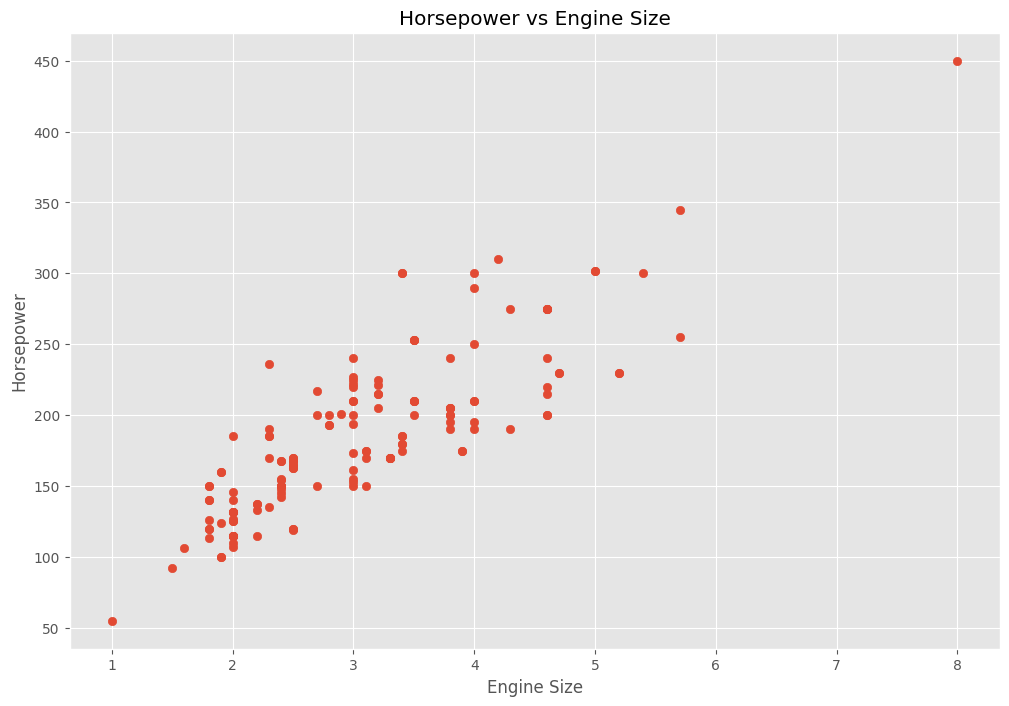

In [34]:
# Assumption is there is direct correlation between engine size and horsepower

plt.scatter(x=df['Engine_size'], y=df['Horsepower'])

plt.title('Horsepower vs Engine Size')

plt.xlabel('Engine Size')

plt.ylabel('Horsepower')

<Axes: xlabel='Engine_size', ylabel='Horsepower'>

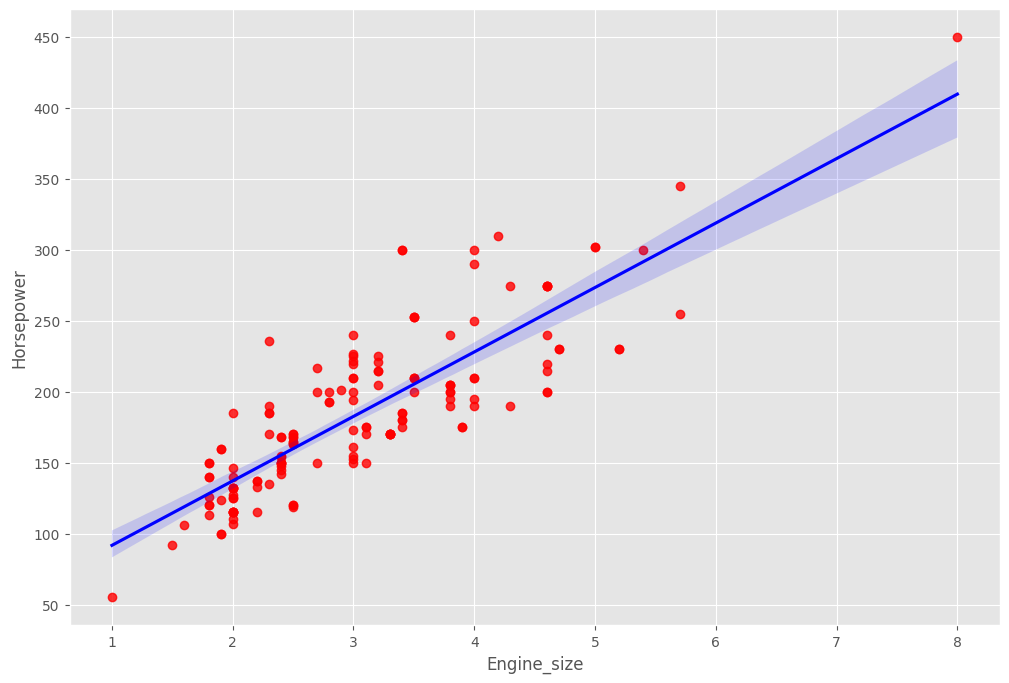

In [35]:
#regression plot

sns.regplot(x='Engine_size', y='Horsepower', data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

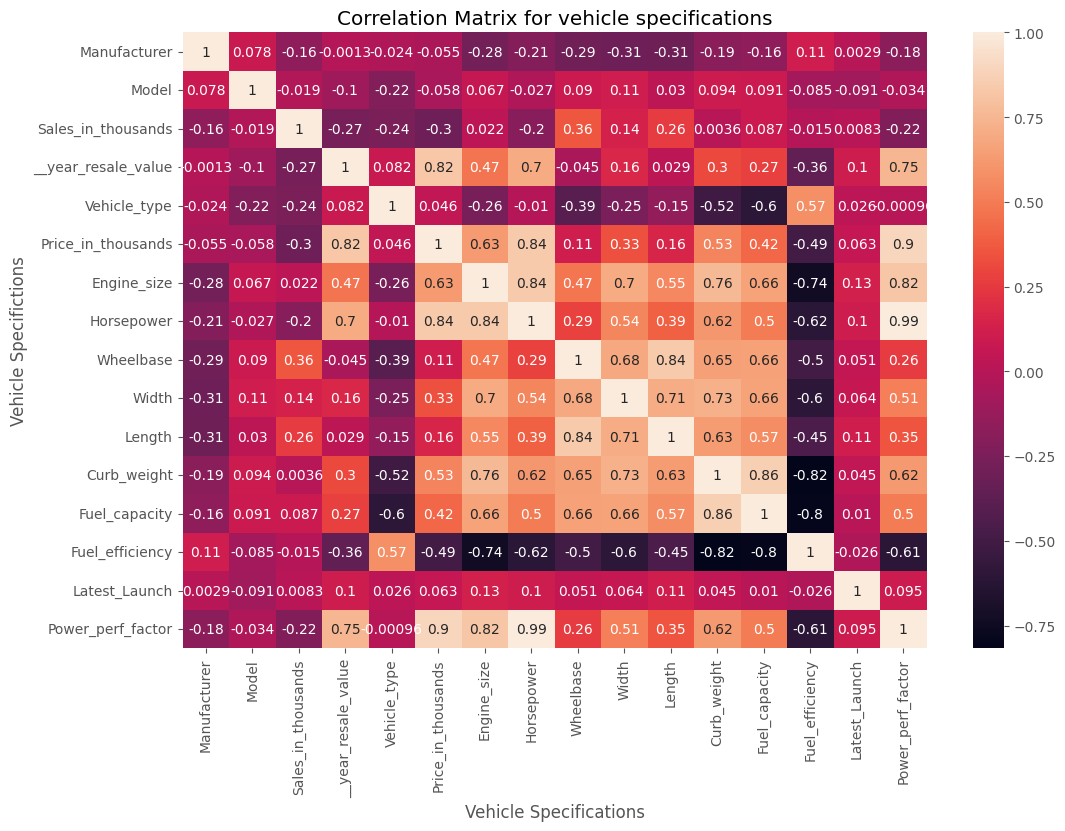

In [36]:
# Perfrom correlation matrix using the Person method to measure the strength of linear relationship between variables.

corr_matrix =df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for vehicle specifications')
plt.xlabel('Vehicle Specifications')
plt.ylabel('Vehicle Specifictions')
plt.show()

In [37]:
correlation_matrix = df_num.corr()
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Fuel_efficiency      Curb_weight           -0.817639
Curb_weight          Fuel_efficiency       -0.817639
Fuel_capacity        Fuel_efficiency       -0.801637
Fuel_efficiency      Fuel_capacity         -0.801637
                     Engine_size           -0.735718
                                              ...   
__year_resale_value  __year_resale_value    1.000000
Sales_in_thousands   Sales_in_thousands     1.000000
Model                Model                  1.000000
Latest_Launch        Latest_Launch          1.000000
Power_perf_factor    Power_perf_factor      1.000000
Length: 256, dtype: float64

In [38]:
high_corr = sorted_pairs[(sorted_pairs) > 0.75]
high_corr

Engine_size          Curb_weight            0.764196
Curb_weight          Engine_size            0.764196
Power_perf_factor    Engine_size            0.819067
Engine_size          Power_perf_factor      0.819067
Price_in_thousands   __year_resale_value    0.822507
__year_resale_value  Price_in_thousands     0.822507
Engine_size          Horsepower             0.839098
Horsepower           Engine_size            0.839098
Length               Wheelbase              0.840338
Wheelbase            Length                 0.840338
Horsepower           Price_in_thousands     0.842582
Price_in_thousands   Horsepower             0.842582
Fuel_capacity        Curb_weight            0.860313
Curb_weight          Fuel_capacity          0.860313
Price_in_thousands   Power_perf_factor      0.899788
Power_perf_factor    Price_in_thousands     0.899788
Horsepower           Power_perf_factor      0.993117
Power_perf_factor    Horsepower             0.993117
Manufacturer         Manufacturer           1.